In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()  #UPLOAD KAGGLE JSON FILE

In [57]:
import numpy as np
import urllib

In [4]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format   #DOWNLOAD THE DATASET

 92% 169M/185M [00:01<00:00, 93.0MB/s]
100% 185M/185M [00:01<00:00, 109MB/s] 


In [8]:
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "az-handwritten-alphabets-in-csv-format.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
A_Z Handwritten Data.csv                       2019-09-26 08:18:04    698907044
A_Z Handwritten Data/A_Z Handwritten Data.csv  2019-09-26 08:18:56    698907044
Extracting all the files now...
Done!


In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data1=pd.read_csv('/content/A_Z Handwritten Data.csv')

In [12]:
data=data1

In [13]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
img1=data.iloc[0]       #VISUALIZING THE FIRST IMAGE

In [15]:
img1=(img1[1:].values).reshape(28,28)

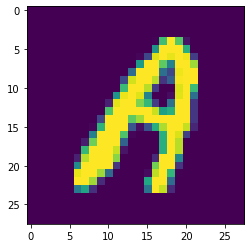

In [16]:
plt.imshow(img1)

In [17]:
data.shape  #FIRST COLUMN IS FOR LABEL AND REST 784(28 BY 28 IMAGE)

(372450, 785)

In [18]:
def extract_img(data):
    ii=[]
    for i in range(data.shape[0]):
        ii.append(np.array(data.iloc[i][1:]).reshape(28,28))
    return ii

In [19]:
images=extract_img(data)

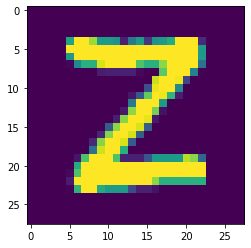

In [20]:
plt.imshow(images[-1])

In [21]:
labels=data['0'].values

In [22]:
labels

array([ 0,  0,  0, ..., 25, 25, 25])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(images, labels, test_size=.2)

In [25]:
import tensorflow as tf

In [26]:
X_train=np.array(X_train)

In [33]:
X_train=X_train.reshape([-1,28,28,1])

In [34]:
X_test=np.array(X_test)

In [35]:
X_test=X_test.reshape(-1,28,28,1)

In [28]:
X_train=X_train.astype('float64')

In [37]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(26, activation=tf.nn.softmax)
    ])
    return cnn_model
  
cnn_model = build_cnn_model()
sd=cnn_model.predict(X_train[0:2])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

In [38]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
cnn_model.fit(X_train,y_train,epochs=1, validation_data=(X_test, y_test), batch_size=64)  # here one iteration through the entire dataset is enough

4656/4656 [==============================] - 207s 44ms/step - loss: 0.2079 - accuracy: 0.9516 - val_loss: 0.0811 - val_accuracy: 0.9775


In [40]:
prd=cnn_model.predict(X_test)

In [41]:
predictions=[]
for i in prd:
  predictions.append(np.argmax(i))

In [43]:
predictions[1]

24

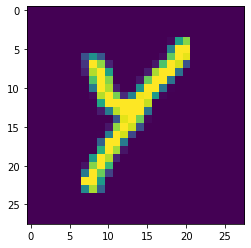

In [44]:
plt.imshow(X_test[1].reshape(28,28))

In [45]:
y_test[1]

24

In [51]:
chr(65+24)               #prediction is correct

'Y'

In [47]:
def predict(image_28by28by1):
  img=image_28by28by1
  img=img.reshape(-1,28,28,1)
  ind=np.argmax(cnn_model.predict(img))
  return chr(65+ind)

In [48]:
predict(X_test[0])

'J'

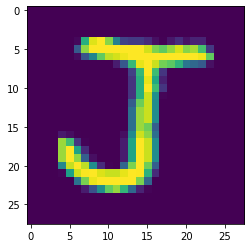

In [49]:
plt.imshow(X_test[0].reshape(28,28))

In [73]:
url='https://i.ibb.co/Fwr3qc0/try.jpg'    #testing on a custom image
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))

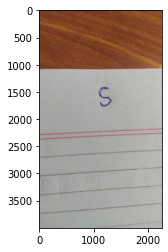

In [75]:
plt.imshow(img)

In [76]:
import cv2 as cv

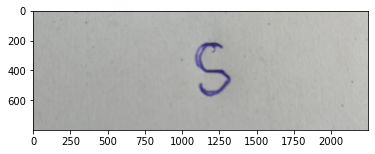

In [77]:
plt.imshow(img[1200:2000])      #resizing image

In [78]:
img=img[1200:2000]

In [79]:
img=img[:, 950:1500]

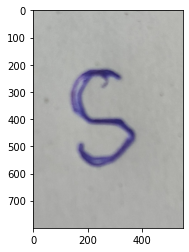

In [80]:
plt.imshow(img)

In [81]:
img=img[100:700,:]

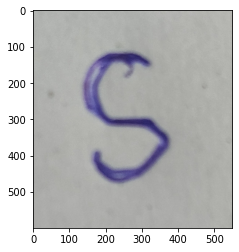

In [82]:
plt.imshow(img)

In [83]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)      #grayscaling img

In [84]:
gray=cv.bitwise_not(gray)                       #inverse the image

In [85]:
for i in range(len(gray)):                      #converting pixel values to either 255 or 0
  for j in range(len(gray[i])):
    if(gray[i][j]>100):gray[i][j]=255
    else: gray[i][j]=0

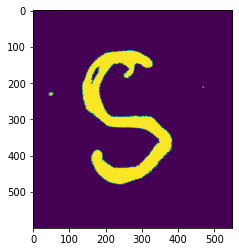

In [86]:
plt.imshow(gray)

In [91]:
fin_img = cv.resize(gray, (28,28))      #resizing to 28by28

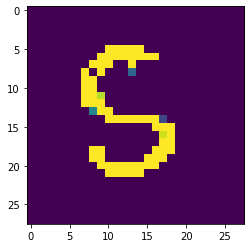

In [92]:
plt.imshow(fin_img)    

In [94]:
predict(fin_img)      #correctly_predicted

'S'

In [131]:
import pickle

In [136]:
cnn_model.save('model.h5')